   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


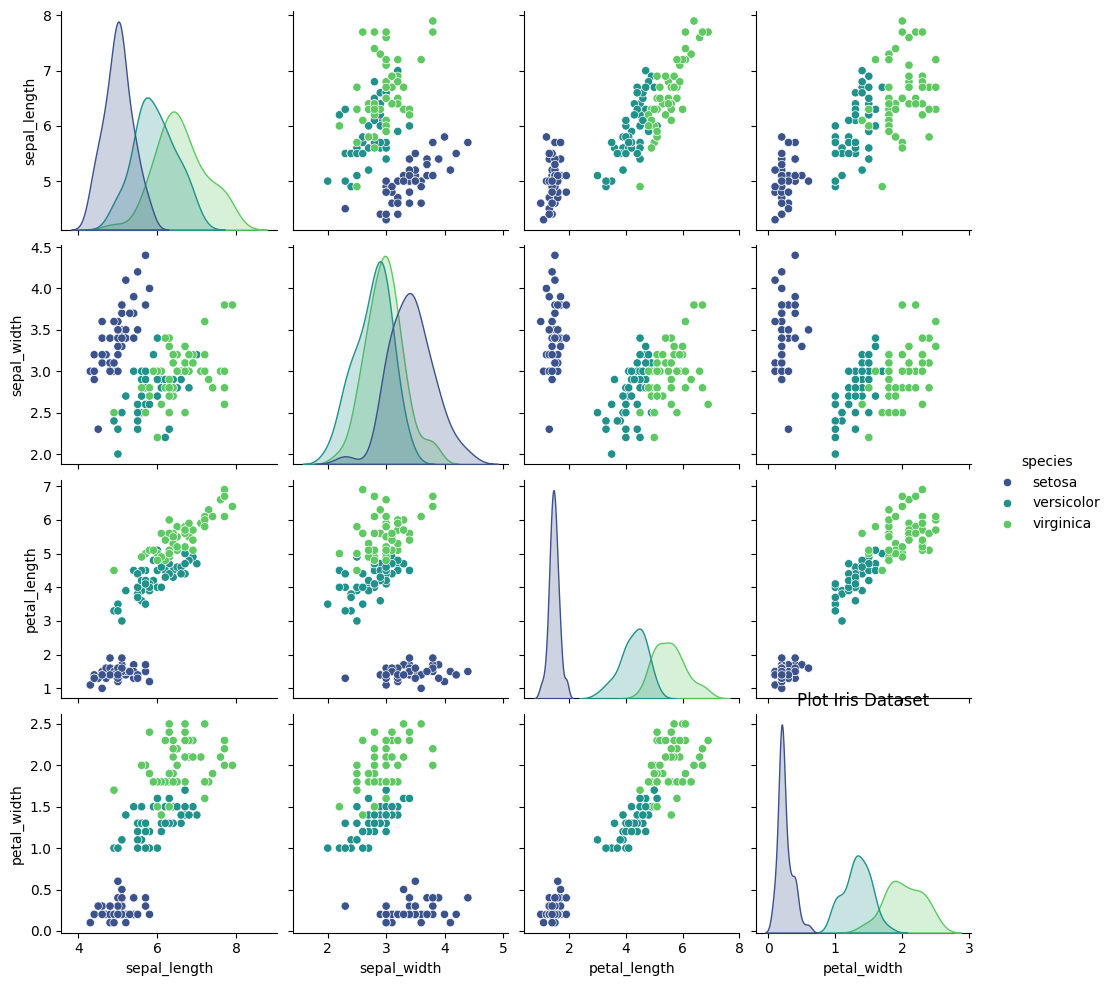

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
iris=sns.load_dataset('iris')
print(iris.head())
sns.pairplot(iris,hue='species',palette='viridis')
plt.title('Plot Iris Dataset')
plt.show()

In [6]:
S=iris.drop(columns='species')
y=iris['species']
c=StandardScaler()
S_standardizE_ds =c.fit_transform(S)
print("Original features of iris dataset:\n",S[:5])
print("Standardized features of dataset(by standardization process):\n",S_standardizE_ds[:5])

Original features of iris dataset:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
Standardized features of dataset(by standardization process):
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [8]:
cvar_matrix=np.cov(S_standardizE_ds,rowvar=False)
print("Computed Covariance Matrix is:\n",cvar_matrix)

Computed Covariance Matrix is:
 [[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [9]:
enval,envectrs=np.linalg.eig(cvar_matrix)
print("Eigenvalues are:\n",enval)
print("Eigenvectors are:\n",envectrs)

Eigenvalues are:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors are:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [11]:
sort_nos =np.argsort(enval)[::-1]
sort_eNvals =enval[sort_nos]
sort_evectrs =envectrs[:,sort_nos]
print("Eigenvalues:\n",sort_eNvals)
M_pcA =S_standardizE_ds.dot(sort_evectrs[:,:2])
print("Shape of original dataset:",S_standardizE_ds.shape)
print("PCA-transformed shape:",M_pcA.shape)

Eigenvalues:
 [2.93808505 0.9201649  0.14774182 0.02085386]
Shape of original dataset: (150, 4)
PCA-transformed shape: (150, 2)


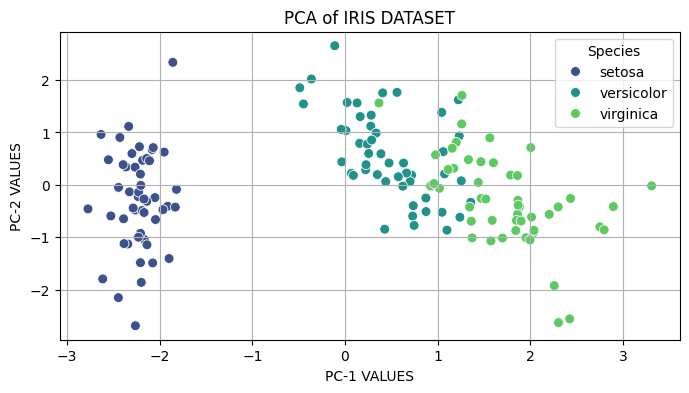

In [18]:
plt.figure(figsize=(8,4))
PCA_df=pd.DataFrame({'PC1':M_pcA[:,0],'PC2':M_pcA[:,1],'species':y})
sns.scatterplot(x='PC1',y='PC2',hue='species',data=PCA_df,palette='viridis',s=50)
plt.title('PCA of IRIS DATASET')
plt.xlabel('PC-1 VALUES')
plt.ylabel('PC-2 VALUES')
plt.legend(title='Species')
plt.grid()
plt.show()